**<h1><center>Lab-08:Report </center></h1>**

**<h1><center>EE5175: Image Signal Processing </center></h1>**


<h4><center>Under the guidence of </center></h4>
<h4><center>Prof. AN.Rajagopalan </center></h4>

<center>By EE21S048</center>

<h9>Date of submission: 26-03-2022<h9>

---

#**2D-Transforms & SVD:**

**Import the libraries:**

In [1]:
from numpy import *
import sys
import cv2
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat


**1. Assume a Markov-1 process with covariance matrix $R$ of size $8 \times 8$ and $\rho=0.91$. Compute the Energy Packing Efficiency and De-correlation Efficiency of the Walsh-Haddamard Transform and Discrete Cosine Transform for the above process. What is your observation about the eigenvectors of $\mathrm{R}$ in relation to the DCT basis?**

**Read the matfile:**

In [2]:
g = loadmat('imageFile.mat')['g']
n = 8
rho = 0.91

##**Markov-1 Process:**

* Generate the covariance for a Markov-1 process with a given parameter $\rho$. The covariance matrix $R$ is given by
$$
R_{i, j}=\rho^{|i-j|}
$$


In [3]:
x =arange(n)
y =arange(n)
X, Y =meshgrid(x, y)
R=rho**(abs(X-Y))
import numpy as np
print(np.round(R,decimals = 3))

[[1.    0.91  0.828 0.754 0.686 0.624 0.568 0.517]
 [0.91  1.    0.91  0.828 0.754 0.686 0.624 0.568]
 [0.828 0.91  1.    0.91  0.828 0.754 0.686 0.624]
 [0.754 0.828 0.91  1.    0.91  0.828 0.754 0.686]
 [0.686 0.754 0.828 0.91  1.    0.91  0.828 0.754]
 [0.624 0.686 0.754 0.828 0.91  1.    0.91  0.828]
 [0.568 0.624 0.686 0.754 0.828 0.91  1.    0.91 ]
 [0.517 0.568 0.624 0.686 0.754 0.828 0.91  1.   ]]


##**2D-DCT:**

* Get the matrix to perform unitary 1D type 2 DCT on an array of length $N$. The unnormalized matrix $C$ has the form

$$
C(k, n) = 2cos\left[\frac{\pi(2n+1)k}{2N}\right], \quad 0 \leq k \leq N-1, \quad 0 \leq n \leq N-1
$$

* Now, we should normalize this so that the transform performed it unitary. The normalizing coefficients are

$$
\frac{1}{\sqrt{4N}}, \quad k = 0
$$

$$
\frac{1}{\sqrt{2N}}, \quad k \geq 1
$$

* Perform 2D DCT using 1D DCT matrices. Given an image $U$ of the shape $m \times n$, its 2D DCT $V$ can be calculated as 
$$
V = C_{m}UC_{n}
$$ where $C_{i}$ is the 1D unitary DCT matrix of size $i \times i$

In [4]:
def DCT_mat(N):
  x=arange(N)
  n, k =meshgrid(x,x)
  Coeff = sqrt(2/N)*(cos(pi*(2*n+1)*k/(2*N)))
  Coeff[k == 0] = sqrt(1/N)
  return Coeff

In [5]:
m, n =shape(R)
A = DCT_mat(m)
B = DCT_mat(n)
R_DCT=A@R@(B.T)
print(np.round(R_DCT,decimals =2))

eval, evec =linalg.eig(R)
print(np.round(eval,decimals =3))

[[ 6.34  0.   -0.29  0.   -0.07 -0.   -0.02  0.  ]
 [ 0.    0.93  0.   -0.03  0.   -0.01  0.   -0.  ]
 [-0.29  0.    0.31  0.   -0.    0.   -0.   -0.  ]
 [ 0.   -0.03  0.    0.15  0.   -0.    0.   -0.  ]
 [-0.07 -0.   -0.    0.    0.09  0.   -0.   -0.  ]
 [-0.   -0.01  0.   -0.    0.    0.07  0.   -0.  ]
 [-0.02  0.   -0.    0.   -0.    0.    0.06 -0.  ]
 [ 0.   -0.   -0.   -0.   -0.   -0.   -0.    0.05]]
[6.358 0.931 0.298 0.148 0.093 0.068 0.055 0.049]


##**Haddamard Transform**
* Haddamard transform matrices, $H_{n}$, are of the form $N \times N$ where $N = 2^{n}, n \in \{1, 2, ... \}$. All of these matrices can be generated from a core matrix $H_{1}$.

$$H_{1} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

* The higher order matrices can be generated from $H_{1}$ recursively as 

$$
H_{n} = H_{n-1}\otimes H_{1} = H_{1} \otimes H_{n-1}, \quad n \geq 2
$$

* Perform 2D WHT using 1D WHT matrices. Given an image $U$ of the shape $m \times n$, its 2D WHT $V$ can be calculated as 
$$
V = H_{m}UH_{n}
$$
where $H_{i}$ is the 1D unitary H matrix of size $i \times i$. It must be noted that $(m, n)$ must be powers of $2$ for the transform to be applied.

In [6]:
def Haddamard_matrix(n):
    H1 =array(([1, 1], [1, -1]))/sqrt(2)
    H = H1.copy()
    if n!= 1:
      for i in range(1, n):
        H = kron(H, H1)
    return H

In [7]:
x, y =shape(R)
n_x = int(ceil(log2(x)))
n_y = int(ceil(log2(y)))

H_x = Haddamard_matrix(n_x)
H_y = Haddamard_matrix(n_y)
R_WHT= H_x@R@(H_y.T)

print(np.round(R_WHT,decimals =2))

[[ 6.34  0.   -0.   -0.07 -0.   -0.13 -0.26  0.  ]
 [ 0.    0.08  0.07  0.    0.13  0.    0.    0.  ]
 [-0.    0.07  0.23  0.    0.26 -0.    0.    0.  ]
 [-0.07  0.    0.    0.09 -0.   -0.   -0.   -0.  ]
 [-0.    0.13  0.26  0.    0.8   0.    0.   -0.09]
 [-0.13 -0.    0.   -0.   -0.    0.09  0.09  0.  ]
 [-0.26 -0.    0.   -0.   -0.    0.09  0.27  0.  ]
 [-0.    0.    0.   -0.   -0.09  0.    0.    0.09]]


##**Energy Packing Efficiency:**
* The energy packing effiency of a covariance matrix $R$ depends on the number of coeffieints we are using and what fraction of the energy can we pack in that. If we are using $m$ coefficients and there are total $N$ coefficients, the energy packing efficiency at $m$, $EPE_{m}$, is given by

$$
EPE_{m} = \frac{\Sigma_{i=1}^{m}R_{i, i}}{\Sigma_{i=1}^{N}R_{i, i}}
$$

* Clearly the energy packing efficiency will be high even with low values of $m$ if the first few coefficients contain a bulk of the energy. It is to be noted than an inherent assumption is the coefficients are in the decreasing order, i.e., 

$$
R(1, 1) \geq R(2, 2) \dots \geq R(N, N)
$$

In [8]:
def EPE_vals(R):
    diag_vals =abs(diag(R))
    total_energy =sum(diag_vals)
    energy_packed =cumsum(diag_vals)
    return energy_packed/total_energy

epe_R_DCT = EPE_vals(R_DCT)
epe_R_WHT = EPE_vals(R_WHT)

print(np.round(epe_R_DCT,decimals =3))
print(np.round(epe_R_WHT,decimals =3))

[0.793 0.909 0.948 0.967 0.979 0.987 0.994 1.   ]
[0.793 0.803 0.831 0.843 0.942 0.954 0.988 1.   ]


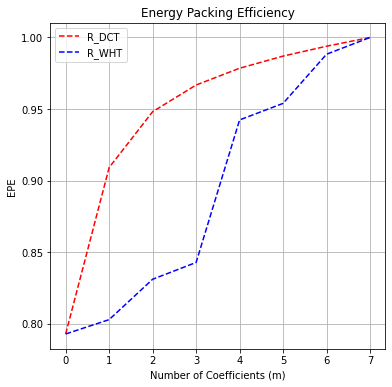

In [9]:
plt.figure(figsize=(6,6))
x=arange(n)
y=arange(n)
plt.plot(x, epe_R_DCT, 'r--')
plt.plot(y, epe_R_WHT, 'b--')
plt.xlabel("Number of Coefficients (m)")
plt.ylabel("EPE")
plt.title("Energy Packing Efficiency")
plt.legend(["R_DCT", "R_WHT"])
plt.grid(True)
plt.show()

* We can clearly see that DCT is packing more energy in the initial few coefficients.

##**Decorrelation Efficiency**
* The decorrelation efficiency measures how well the transformed data $R'$ is decorrelated compared to the original data $R$. It is defined as

$$
\eta = 1 - \frac{\alpha}{\beta}
$$

$$
\alpha = \Sigma_{i, j = 1, i \neq j}^{N}|R'_{i, j}|
$$

$$
\beta = \Sigma_{i, j = 1, i \neq j}^{N}|R_{i, j}|
$$

* Clearly, for a given $R$, $\eta$ will be high when the off-diagonal elements in $R'$ are close to zero.

In [10]:
def decorrelation_efficiency(R, R_prime):
    n =shape(R)[0]
    non_diagonal_vals = 1-eye(n)
    R_ =abs(non_diagonal_vals*R)
    R_prime_ =abs(non_diagonal_vals*R_prime)
    alpha =sum(R_prime_)
    beta =sum(R_)
    eta = 1-(alpha/beta)
    return eta

# compute the decorrelation efficiencies
eta_R_DCT = decorrelation_efficiency(R, R_DCT)
eta_R_WHT = decorrelation_efficiency(R, R_WHT)

In [11]:
print(f"Decorrelation Efficiency of R for DCT : {eta_R_DCT}")
print(f"Decorrelation Efficiency of R for WHT : {eta_R_WHT}")

Decorrelation Efficiency of R for DCT : 0.9804711989227338
Decorrelation Efficiency of R for WHT : 0.9485667904674058


* We can clearly see that DCT is doing a better job at decorrelating $R$.
---

2. Find $\beta^{2} R^{-1}$, where $\beta^{2}=\frac{1-\rho^{2}}{1+\rho^{2}}$. Does $\beta^{2} R^{-1}$ have a tridiagonal structure?. Is it close to the tridiagonal matrix $Q$ given by,

$$
\mathbf{Q}=\left[\begin{array}{cccccccc}
1-\alpha & -\alpha & 0 & 0 & 0 & 0 & 0 & 0 \\
-\alpha & 1 & -\alpha & 0 & 0 & 0 & 0 & 0 \\
0 & -\alpha & 1 & -\alpha & 0 & 0 & 0 & 0 \\
0 & 0 & -\alpha & 1 & -\alpha & 0 & 0 & 0 \\
0 & 0 & 0 & -\alpha & 1 & -\alpha & 0 & 0 \\
0 & 0 & 0 & 0 & -\alpha & 1 & -\alpha & 0 \\
0 & 0 & 0 & 0 & 0 & -\alpha & 1 & -\alpha \\
0 & 0 & 0 & 0 & 0 & 0 & -\alpha & 1-\alpha
\end{array}\right]
$$

where $\alpha=\frac{\rho}{1+\rho^{2}}$

Try diagonalizing $\beta^{2} R^{-1}$ and $\mathrm{Q}$ using the DCT matrix. What is your observation.?

**Inverse of R**
* If $R$ is the covariance matrix of a Markov-1 process with parameter $\rho$, its inverse, $R^{-1}$ satisfies
$$
\beta^{2}R^{-1} \approx Q_{\alpha}
$$
where,
$Q_{\alpha}$ is the tridiagonal matrix with parameter $\alpha$,
$$
\beta^{2} = \frac{1-\rho^{2}}{1+\rho^{2}}
$$
and, 
$$
\alpha = \frac{\rho}{1+\rho^{2}}
$$

In [12]:
alpha=rho/(1+rho**2)
beta=sqrt((1-rho**2)/(1+rho**2))
print(alpha,beta)

0.4977845850883431 0.3066464660471657


In [13]:
# get the scaled inverse of R
beta_sqr_R_inv = (beta**2)*(linalg.inv(R))
print(np.round(beta_sqr_R_inv,decimals =3))

[[ 0.547 -0.498 -0.     0.    -0.    -0.     0.    -0.   ]
 [-0.498  1.    -0.498  0.    -0.     0.    -0.     0.   ]
 [-0.    -0.498  1.    -0.498  0.    -0.     0.    -0.   ]
 [-0.    -0.    -0.498  1.    -0.498  0.    -0.     0.   ]
 [-0.    -0.     0.    -0.498  1.    -0.498  0.    -0.   ]
 [-0.     0.    -0.     0.    -0.498  1.    -0.498  0.   ]
 [ 0.    -0.     0.     0.    -0.    -0.498  1.    -0.498]
 [-0.     0.     0.    -0.     0.    -0.    -0.498  0.547]]


**Tridiagonal Matrix:**

Generate a matrix with a tridiagonal structure for a given value of $\alpha$ as given in the question statement. 

In [14]:
# generate the tridiagonal matrix Q
Q =zeros((n, n))
x =arange(n)
y =arange(n)
X, Y =meshgrid(x, y)
diff =abs(X-Y)
Q[diff == 1] = -alpha
Q[diff == 0] = 1
Q[0, 0] = 1-alpha
Q[-1, -1] = 1-alpha
print(np.round(Q,decimals =3))

[[ 0.502 -0.498  0.     0.     0.     0.     0.     0.   ]
 [-0.498  1.    -0.498  0.     0.     0.     0.     0.   ]
 [ 0.    -0.498  1.    -0.498  0.     0.     0.     0.   ]
 [ 0.     0.    -0.498  1.    -0.498  0.     0.     0.   ]
 [ 0.     0.     0.    -0.498  1.    -0.498  0.     0.   ]
 [ 0.     0.     0.     0.    -0.498  1.    -0.498  0.   ]
 [ 0.     0.     0.     0.     0.    -0.498  1.    -0.498]
 [ 0.     0.     0.     0.     0.     0.    -0.498  0.502]]


In [15]:
# Diagonalize Q and scaled inverse of R using DCT
m, n =shape(beta_sqr_R_inv)
A = DCT_mat(m)
B = DCT_mat(n)
beta_sqr_R_inv_DCT=A@beta_sqr_R_inv@(B.T)
print(np.round(beta_sqr_R_inv_DCT,decimals =3))

m, n =shape(Q)
A = DCT_mat(m)
B = DCT_mat(n)
Q_DCT=A@Q@(B.T)


[[ 0.016 -0.     0.015  0.     0.011  0.     0.006  0.   ]
 [-0.     0.102 -0.     0.018  0.     0.012  0.     0.004]
 [ 0.015  0.     0.315  0.     0.015  0.     0.008  0.   ]
 [-0.     0.018 -0.     0.634  0.     0.01   0.     0.004]
 [ 0.011  0.     0.015  0.     1.011  0.     0.006  0.   ]
 [-0.     0.012 -0.     0.01   0.     1.388  0.     0.002]
 [ 0.006  0.     0.008  0.     0.006 -0.     1.707  0.   ]
 [-0.     0.004  0.     0.004 -0.     0.002 -0.     1.921]]


In [16]:
print(np.round(Q_DCT,decimals =3))

[[ 0.004  0.    -0.     0.     0.    -0.    -0.     0.   ]
 [-0.     0.08  -0.     0.    -0.    -0.     0.    -0.   ]
 [-0.    -0.     0.296  0.    -0.     0.    -0.     0.   ]
 [-0.     0.     0.     0.619  0.    -0.     0.    -0.   ]
 [ 0.    -0.    -0.     0.     1.     0.    -0.    -0.   ]
 [-0.    -0.     0.    -0.     0.     1.381  0.     0.   ]
 [-0.     0.    -0.     0.    -0.     0.     1.704 -0.   ]
 [ 0.    -0.     0.    -0.    -0.     0.    -0.     1.92 ]]


---
3. Compute SVD for the given $8 \times 8$ image $\mathbf{g}$ (provided in imageFile.mat and also given below) using the following steps:

(a) Perform eigen-value decomposition of $\mathbf{g}^{T} \mathbf{g}$ and $\mathbf{g g}^{T}$.

(b) Find the singular value matrix $\boldsymbol{\Sigma}$.

(c) Reconstruct the image using $\boldsymbol{\Sigma}$ and the eigen-vector matrices.

##**Singular Value Decomposition (SVD):**
* Given a matrix $g$, its $SVD$ is given as
$$
g = A\Sigma B^{T}
$$
$A$ is the matrix with the eigenvalues of $g g^{T}$ as its columns, $B$ is the matrix with the eigenvalues of $g^{T}g$, and $\Sigma$ is the matrix of singular values. Given a matrix $g$ we perform SVD on it using the following steps 
- Perform eigen-decomposition of $gg^{T}$ and $g^{T}g$
- Find the singular value matrix $\Sigma$ using the eigenvalues of $gg^{T}$ and $g^{T}g$


In [17]:
g = g.astype(float64)
print(np.round(g,decimals =3))

[[207. 244. 107. 173.  70. 111. 180. 244.]
 [230. 246. 233. 193.  11.  97. 192.  86.]
 [ 32.  40. 202. 189.  24. 195.  70. 149.]
 [232. 247. 244. 100. 209. 202. 173.  57.]
 [161. 244. 167. 167. 177.  47. 167. 191.]
 [ 24. 123.   9.  43.  80. 124.  41.  65.]
 [ 71. 204. 216. 180. 242. 113.  30. 129.]
 [139.  36. 238.   8.   8. 164. 127. 178.]]


In [18]:
m, n = shape(g)
limiting_dim = min(m, n)

eval1, evec1 =linalg.eig(g@(g.T))
idx = eval1.argsort()[::-1]
eval1 = eval1[idx]
evec1 = evec1[:, idx]

eval2, evec2 =linalg.eig((g.T)@g)
idx = eval2.argsort()[::-1]
eval2 = eval2[idx]
evec2 = evec2[:, idx]

sigma = zeros((m, n))

for i in range(limiting_dim):
  sigma[i, i] = (sqrt(eval1[i])+sqrt(eval2[i]))/2
  v = evec2[:, i]
  # This step is to ensure we have the correct pairing of the eigenvectors in the
  # A and B matrices. This is necessary as v and -v are eigenvectors of the same matrix
  # with the same eigenvalue
  if sum((g@v-sigma[i, i]*evec1[:, i])**2) > sum((g@v+sigma[i, i]*evec1[:, i])**2):
      evec2[:, i] = -v

A, Sigma, B = evec1, sigma, evec2
#print(A, Sigma, B)
print(np.round(A,decimals =3))
print(np.round(Sigma,decimals =3))
print(np.round(B,decimals =3))

[[ 0.408  0.045 -0.42  -0.472 -0.318 -0.179  0.069  0.543]
 [ 0.411 -0.093 -0.468  0.159  0.645 -0.084  0.329 -0.217]
 [ 0.271 -0.519  0.425 -0.351  0.325 -0.282 -0.41   0.013]
 [ 0.448  0.165  0.101  0.713 -0.125 -0.217 -0.36   0.249]
 [ 0.403  0.318 -0.115 -0.25  -0.113  0.442 -0.451 -0.499]
 [ 0.149  0.146  0.149 -0.078 -0.358 -0.655  0.285 -0.538]
 [ 0.36   0.342  0.614 -0.112  0.152  0.272  0.477  0.199]
 [ 0.277 -0.673  0.024  0.2   -0.445  0.369  0.278 -0.135]]
[[1169.348    0.       0.       0.       0.       0.       0.       0.   ]
 [   0.     287.695    0.       0.       0.       0.       0.       0.   ]
 [   0.       0.     257.499    0.       0.       0.       0.       0.   ]
 [   0.       0.       0.     214.284    0.       0.       0.       0.   ]
 [   0.       0.       0.       0.     163.175    0.       0.       0.   ]
 [   0.       0.       0.       0.       0.     132.729    0.       0.   ]
 [   0.       0.       0.       0.       0.       0.      45.266    0.   ]
 [

In [19]:
g_hat=A@Sigma@(B.T)
print(np.round(g_hat,decimals =3))

[[207. 244. 107. 173.  70. 111. 180. 244.]
 [230. 246. 233. 193.  11.  97. 192.  86.]
 [ 32.  40. 202. 189.  24. 195.  70. 149.]
 [232. 247. 244. 100. 209. 202. 173.  57.]
 [161. 244. 167. 167. 177.  47. 167. 191.]
 [ 24. 123.   9.  43.  80. 124.  41.  65.]
 [ 71. 204. 216. 180. 242. 113.  30. 129.]
 [139.  36. 238.   8.   8. 164. 127. 178.]]


---
4. Remove one singular value at a time from $\boldsymbol{\Sigma}$ and reconstruct the image $\left(\widehat{\mathbf{g}_{k}}\right)$. Compute $\left\|\mathbf{g}-\widehat{\mathbf{g}_{k}}\right\|^{2}$ and compare it with the sum of the squares of the first $k$ singular values. 

$$\mathbf{IMGg}=\left[\begin{array}{cccccccc}207 & 244 & 107 & 173 & 70 & 111 & 180 & 244 \\ 230 & 246 & 233 & 193 & 11 & 97 & 192 & 86 \\ 3 & 40 & 202 & 189 & 24 & 195 & 70 & 149 \\ 232 & 247 & 244 & 100 & 209 & 202 & 173 & 57 \\ 161 & 244 & 167 & 167 & 177 & 47 & 167 & 191 \\ 24 & 123 & 9 & 43 & 80 & 124 & 41 & 65 \\ 71 & 204 & 216 & 180 & 242 & 113 & 30 & 129 \\ 139 & 36 & 238 & 8 & 8 & 164 & 127 & 178\end{array}\right]$$

In [20]:
# get the theoretical and experimental reconstruction errors

reconstruction_errors = np.zeros(limiting_dim)
reconstructed_matrix = g.copy()     # start with a copy of the original image

for i in range(limiting_dim):  
    reconstructed_matrix -= Sigma[i, i]*np.outer(A[:, i], B[:, i])   # remove the contribution of the ith singular value and its vectors    
    reconstruction_errors[i] = np.sum((reconstructed_matrix - g)**2) # get the l2 norm
err_exp=reconstruction_errors

sigma = Sigma[Sigma > 0]
err_the=np.cumsum(sigma**2)
print(np.round(err_the,decimals=3))
print(np.round(err_exp,decimals=3))

[1367373.911 1450142.05  1516447.967 1562365.774 1588991.908 1606609.007
 1608658.005 1609692.   ]
[1367373.911 1450142.05  1516447.967 1562365.774 1588991.908 1606609.007
 1608658.005 1609692.   ]


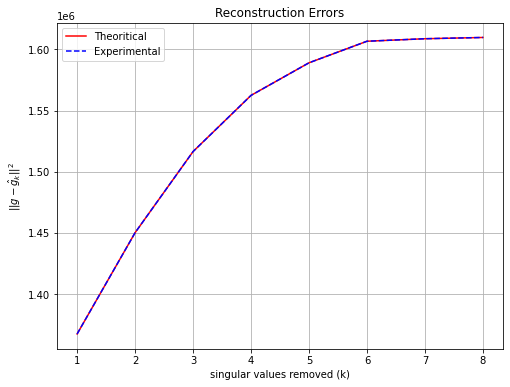

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(n)+1,err_the,'r-')
plt.plot(np.arange(n)+1,err_exp,'b--')
plt.xlabel("singular values removed (k)")
plt.ylabel('$||g-\hat{g}_{k}||^{2}$')
plt.legend(["Theoritical", "Experimental"])
plt.title("Reconstruction Errors")
plt.grid(True)
plt.show()

##**Conclusion:**

* DCT performs better than WHT in both energy packing and decorrelation.
* Eigenvectors of $R$ are close to the DCT basis vectors but not exactly the same.
* $\beta^{2}R^{-1}$ is similar to tridiagonal structure $Q$ as $\rho$ tends to 1.
* DCT matrix exactly diagonalizes $Q_{\alpha}$, a tridiagonal matrix with parameter $\alpha$ and mostly diagonalizes $\beta^{2}R^{-1}$ but not completely.
* Computing the $SVD$ for an image and reconstructing it using all the singular values gives an exact reconstruction.

* **Ensemble property:** The theoretical and calculated values for reconstruction errors on removing $k$ singular values is the sum of the squares of those $k$ singular 
$$
||g-\hat{g}_{k}||_{F}^{2} = \Sigma_{i=1}^{k}\sigma_{i}^{2}
$$

---